# Problem Statement

In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

# Introduction to Dataset

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
from google.colab import files
import io
import seaborn
from datetime import datetime


In [2]:
uploaded = files.upload()
loan_df = pandas.read_csv(io.BytesIO(uploaded['loan.csv']))
loan_df.head(5)

Saving loan.csv to loan.csv


<ipython-input-2-b220f1ed7781>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pandas.read_csv(io.BytesIO(uploaded['loan.csv']))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Getting the shape of the dataframe

In [3]:
loan_df.shape


(39717, 111)

As it can be seen that we have 111 columns.We will now remove the unnecessary columns which are not requried.Getting the list of the columns

In [4]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Cleaning the Dataframe

Checking the columns which have NA values.Some of the columns will have all the columns as NA.As the number of NA values equal the row count in the dataframe

In [5]:
loan_df.isna().sum().sort_values(ascending =False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

We have seen from above that there are columns where all the values are NA.So we will drop those columns from the dataset

In [6]:
loan_df.dropna(how='all',axis=1,inplace=True)

Checking the shape of the dataframe again

In [7]:
loan_df.shape

(39717, 57)

Checking columns which have unique values.If some columns have only 1 unique value then those columns will not play any affect on Loan Charge Off

In [8]:
columns=loan_df.nunique()

So we are dropping those columns from the dataframe as they won't be having any effect on the outcome of the loan

In [9]:
single_values_columns=columns[columns.values==1]

Name of the columns with single value in them are as below:
1.  pymnt_plan
2.  initial_list_status
3.  collections_12_mths_ex_med
4.  policy_code
5.  application_type
6.  acc_now_delinq
7.  chargeoff_within_12_mths
8.  delinq_amnt
9.  tax_liens

In [10]:
single_values_columns.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [11]:
loan_df.drop(list(single_values_columns.index),axis=1,inplace=True)

Checking the shape of the dataframe

In [12]:
loan_df.shape

(39717, 48)

Removing below columns from the dataframe as these won't affect the loan rejection outcome.We got the definition of these columns from the Data dictionary

1. id-> A unique LC assigned ID for the loan listing.
2. member_id-> A unique LC assigned Id for the borrower member.
3. url-> URL for the LC page with listing data.
4. zip_code-> The first 3 numbers of the zip code provided by the borrower in the loan application.



In [13]:
columns_to_drop=['id','member_id','url','zip_code']
loan_df.drop(columns=columns_to_drop,inplace=True)

In [14]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Checking the Percentage of the missing values in the columns

In [15]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
r

It can be seen from the above derivation that there are still columns where the number of missing values is still very high.We will remove those columns.The columns are
1. desc
2. next_payment_d
3. mths_since_last_record
4. mths_since_last_delinq

In [16]:
loan_df.drop(columns=['desc','next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],inplace=True)

In [17]:
loan_df.shape

(39717, 40)

Checking the percentage of missing values again

In [18]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.191303
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.027696
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0

Now we will check at row level to see if any row is having more NA values than the required

In [19]:
loan_df.isnull().sum(axis=1).sort_values(ascending=False)

32545    3
16719    3
28980    3
24984    3
28547    3
        ..
15370    0
15369    0
15368    0
15367    0
19858    0
Length: 39717, dtype: int64

It could be seen that there are  rows which have 4 null values,which should be fine as we have total 40 columns

We will now insert missing values into the other columns which have some missing values.We will be making use of Mode as the element which has to be inserted for NA values.The reason for picking mode is because of biasness which we may get for Numerical Columns.

In [20]:
loan_df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
mode_value=loan_df['emp_length'].mode()
loan_df['emp_length'].fillna(value=mode_value[0],inplace=True)
loan_df['emp_length'].isna().sum()

0

In [22]:
loan_df['emp_length'].value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
mode_value_bankruptcies=loan_df['pub_rec_bankruptcies'].mode()
loan_df['pub_rec_bankruptcies'].fillna(value=mode_value_bankruptcies[0],inplace=True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

In [24]:
loan_df['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [25]:
mode_value=loan_df['emp_title'].mode()
loan_df['emp_title'].fillna(value=mode_value[0],inplace=True)
loan_df['emp_title'].isna().sum()

0

In [26]:

loan_df['pub_rec_bankruptcies'].value_counts()
loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)
loan_df['pub_rec_bankruptcies'].isna().sum()

0

This column defines Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit , so very high chances that the borrower has not done this event and hence value should 
be replaced by 0% and would also like to mention that when we look at the mode value , the same is also 0% but had it not be same , we still should have gone with assumption that borrower has not performed the event 


In [27]:
mode_value = loan_df['revol_util'].mode()[0]
loan_df['revol_util'].fillna("0%",inplace=True)
loan_df['revol_util'].isna().sum()

0

Checking the datatype of the Columns present in the dataframe

In [28]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## Standardise the Data

Checking the information present in each column

In [29]:
loan_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,US Army,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,US Army,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [30]:
loan_df['emp_length']=loan_df['emp_length'].apply(lambda x: 0 if '<' in str(x) else (10 if '+' in str(x) else str(x).split()[0]))

In [31]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(str(x)[:-1]))
loan_df['int_rate'].head(5)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [32]:
loan_df['term']=loan_df['term'].apply(lambda x:float(str(x).replace(" months",'')))
loan_df['term'].head(5)

0    36.0
1    60.0
2    36.0
3    36.0
4    60.0
Name: term, dtype: float64

Out of all the columns which we have there will be only few columns which will be available to us at the time of filling a loan application and some variables will be generate after the loan has been approved based on the customer.We can remove those columns which are generated after the loan has been approved.


In [33]:
columns_after_loan_application =  [
  "earliest_cr_line",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [34]:
loan_df.drop(columns=columns_after_loan_application,inplace=True)

In our current dataset we have all the users whose loans have been:

1. Charged Off
2. Completed
3. Ongoing

Let us see the distribution of the dataset based on the loan status

In [35]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [36]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  float64
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                39717 non-null  object 
 9   emp_length               39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

People with Loan status as Current will not play any major role in our analysis.So we can filter them out

In [37]:
loan_df_filtered=loan_df[loan_df['loan_status']!='Current']

Let us check the shape of the dataset after filtering


In [38]:
loan_df_filtered.shape

(38577, 31)

# Univariate Analysis

Now we will perform analysis on the data

We will start with analysing the distribution of loan amount.How the amount is distributed.For that we will make use of histogram.

<Axes: xlabel='loan_amnt', ylabel='Count'>

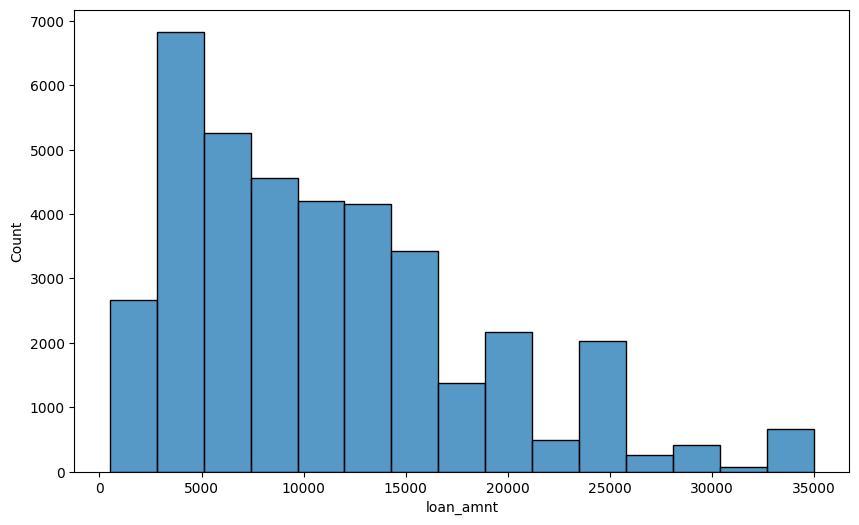

In [39]:
ax = plt.subplots(figsize=(10, 6))
seaborn.histplot(data=loan_df_filtered,x='loan_amnt',bins=15)

**It can be seen that majority of the loans are in the range 2500-5000**

We will also check the income distribution of the applicants.For that we will make use of Boxplot

<Axes: xlabel='loan_status', ylabel='annual_inc'>

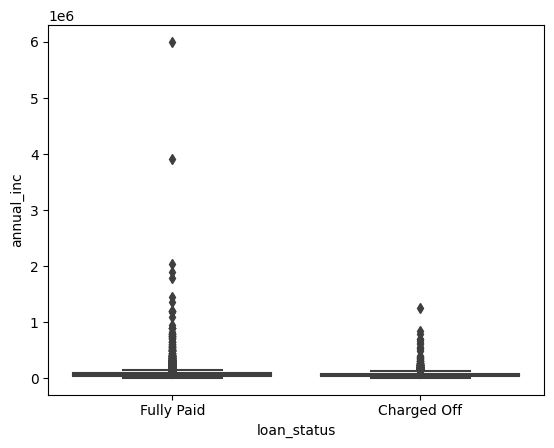

In [40]:
seaborn.boxplot(y=loan_df_filtered['annual_inc'],x=loan_df_filtered['loan_status'],data=loan_df_filtered)

We cannot make any conlcusion from the graph.We need to remove the outliers.We will make use of IQR to remove the outliers from the dataset.the minimum value will be Q1-IQR*1.5 and maximum value will be Q3+IQR*1.5

In [41]:
Q1=numpy.percentile(loan_df_filtered['annual_inc'],25)
Q3=numpy.percentile(loan_df_filtered['annual_inc'],75)
IQR=Q3-Q1
IQR

42000.0

In [42]:
upper_limit_income=Q3+1.5*IQR
lower_limit_income=Q1-1.5*IQR
print("Lower Limit {}",lower_limit_income)
print("Upper Limit {}",upper_limit_income)

Lower Limit {} -23000.0
Upper Limit {} 145000.0


In [43]:
min(loan_df_filtered['annual_inc'])

4000.0

Since there are no negative values present in the annual income field we can ignore the lower limit

We will now remove the outliers after checking the upper limit on the data



In [44]:
loan_df_filtered.drop(loan_df_filtered[(loan_df_filtered['annual_inc']>=upper_limit_income)].index,inplace=True)

<ipython-input-44-77ad039a57de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_filtered.drop(loan_df_filtered[(loan_df_filtered['annual_inc']>=upper_limit_income)].index,inplace=True)


Checking the shape of the data after removing the outliers and plotting the graph again

In [47]:
loan_df_filtered.shape

(36754, 31)

<Axes: xlabel='loan_status', ylabel='annual_inc'>

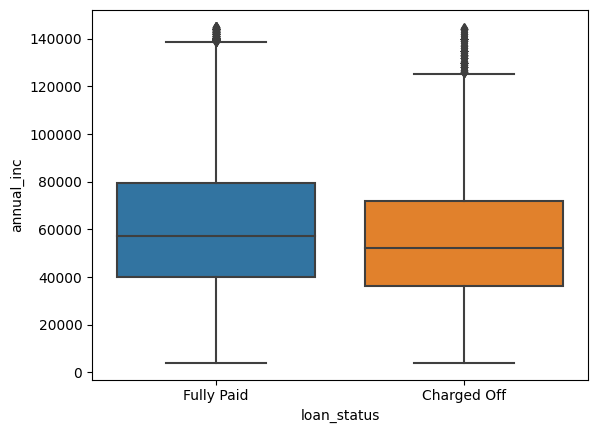

In [48]:
seaborn.boxplot(y=loan_df_filtered['annual_inc'],x=loan_df_filtered['loan_status'],data=loan_df_filtered)

Now we will check distribution of intreset rate through histplot

<Axes: xlabel='int_rate', ylabel='Count'>

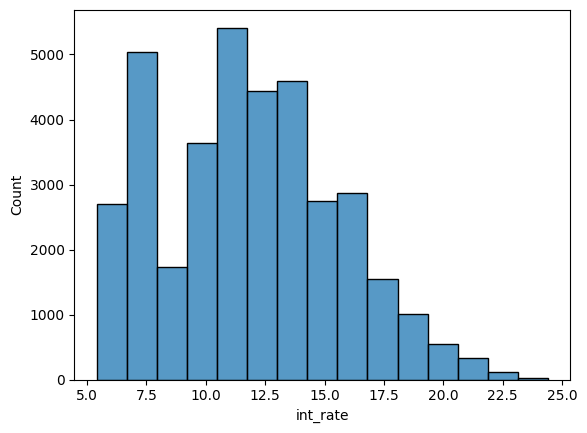

In [49]:
seaborn.histplot(data=loan_df_filtered,x='int_rate',bins=15)

**Intrest Rates between 10.5 and 12 are the highest**

Text(0.5, 1.0, 'Investor Funded Amount')

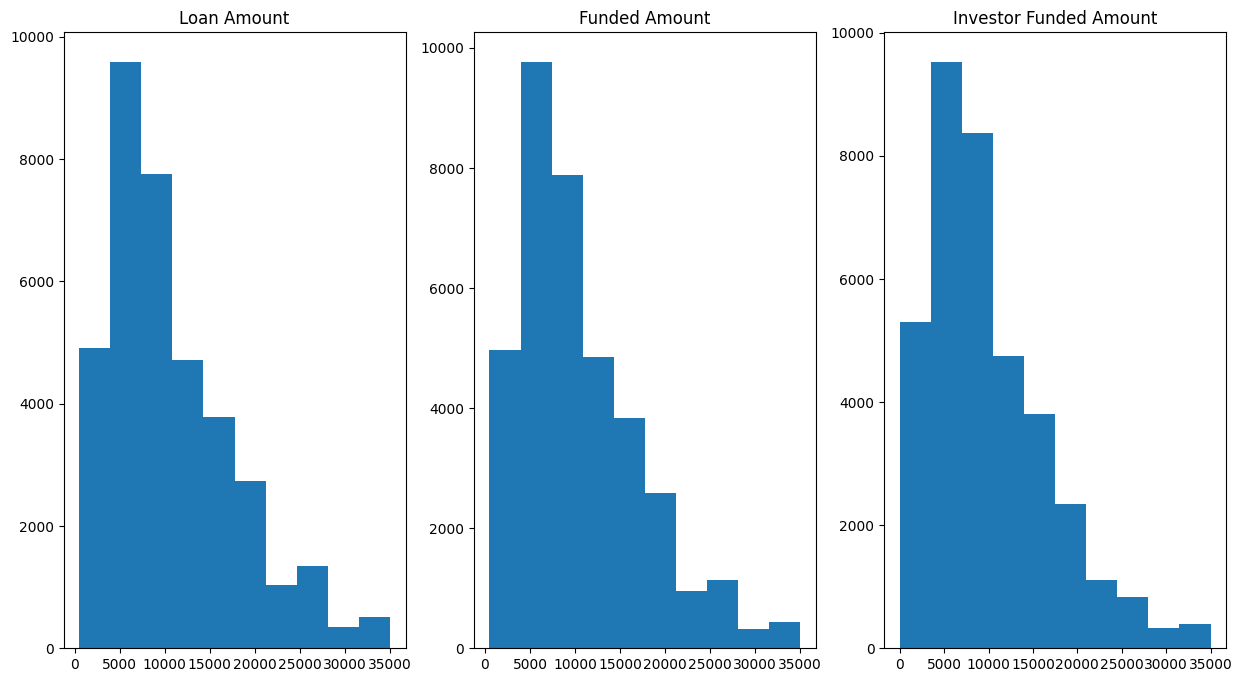

In [50]:
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
ax=plt.hist(data=loan_df_filtered,x='loan_amnt',bins=10)
plt.title("Loan Amount")
plt.subplot(1, 3, 2)
plt.hist(data=loan_df_filtered,x='funded_amnt',bins=10)
plt.title("Funded Amount")
plt.subplot(1, 3, 3)
plt.hist(data=loan_df_filtered,x='funded_amnt_inv',bins=10)
plt.title("Investor Funded Amount")


We can see that there is not a lot of difference in these Loan values





Checking Loan distribution across the states

<Axes: xlabel='addr_state', ylabel='Count'>

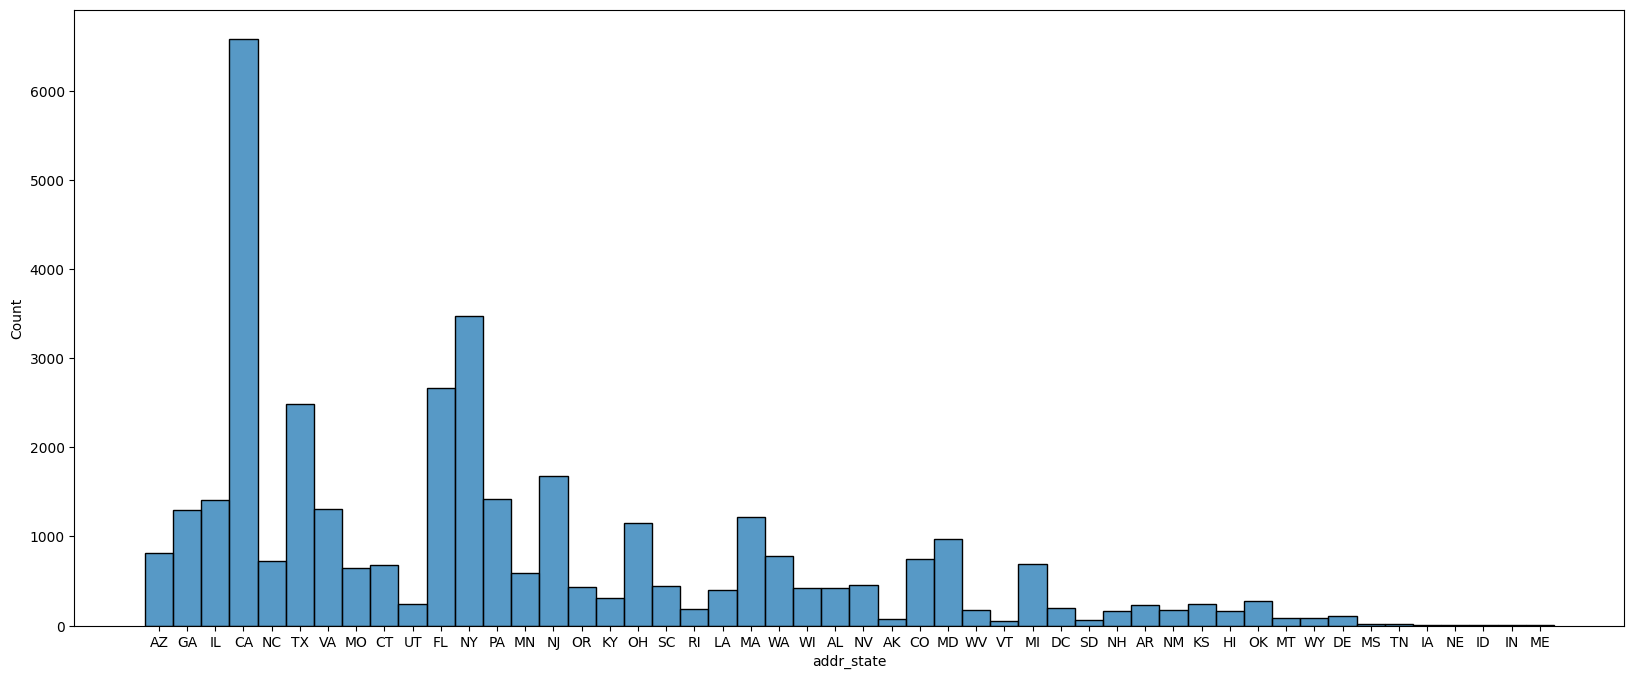

In [52]:
plt.figure(figsize=(20,8))
seaborn.histplot(data=loan_df_filtered,x='addr_state',bins=15)

**California has the highest number of loans disbursement**

Now let us check the number of delinquencies

<Axes: xlabel='delinq_2yrs', ylabel='Count'>

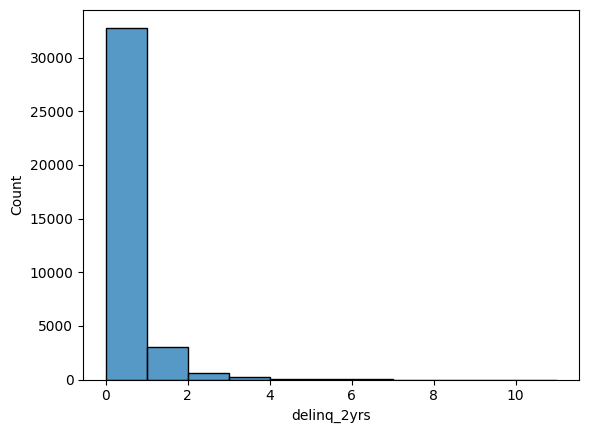

In [60]:
seaborn.histplot(data=loan_df_filtered,x='delinq_2yrs',bins=11)

It can be seen that the number of delinquencies are reported in last 2 years are 0.Most fo the Loans are given to people who are less delinquent

<Axes: xlabel='emp_length', ylabel='Count'>

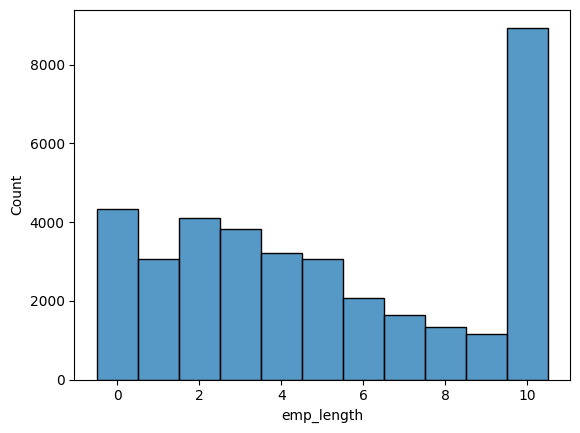

In [61]:
seaborn.histplot(data=loan_df_filtered,x='emp_length',bins=11)

Loans are mostly given to people with 10 or more years of experience

We will now check loan distribution with home ownership

<Axes: xlabel='home_ownership', ylabel='Count'>

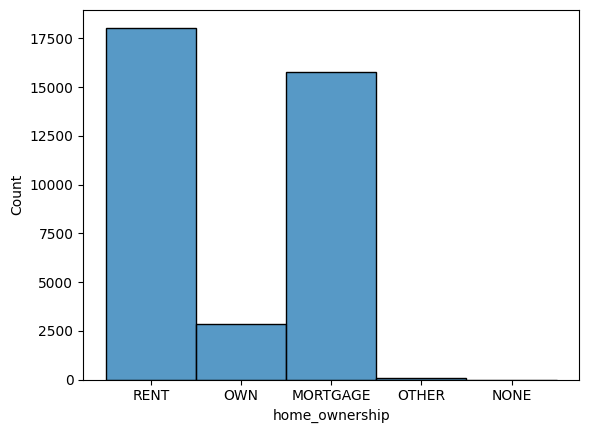

In [63]:
seaborn.histplot(data=loan_df_filtered,x='home_ownership',bins=4)

**Loans are mostly given to the Applicants on Rent**

<Axes: xlabel='installment', ylabel='Count'>

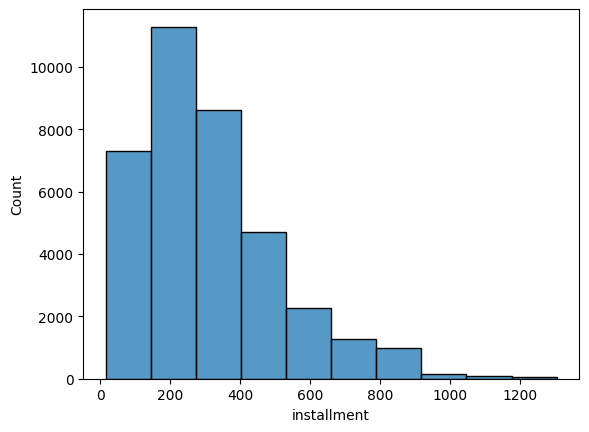

In [66]:
seaborn.histplot(data=loan_df_filtered,x='installment',bins=10)

** We can see that most of the installments are between 150-300 **

Let us see the term distribution  for loans

<Axes: xlabel='term', ylabel='count'>

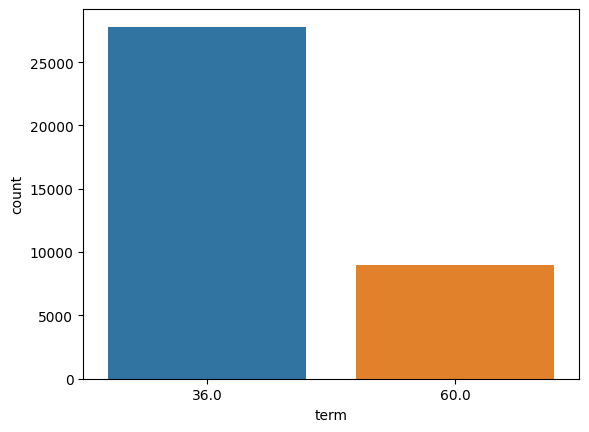

In [74]:
seaborn.countplot(data=loan_df_filtered,x='term')

Most of the loans have term of 36

Let us check the verification status of the loans

<Axes: xlabel='verification_status', ylabel='count'>

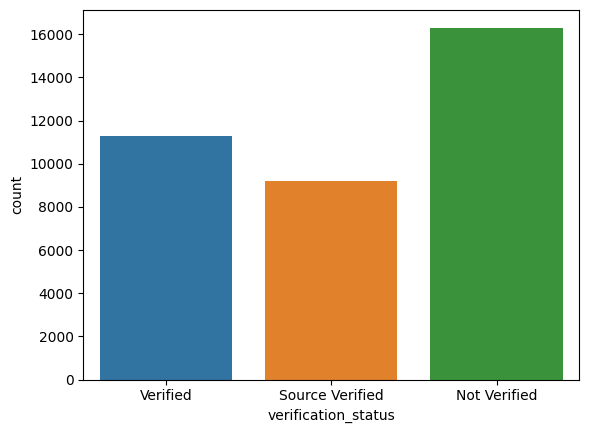

In [75]:
seaborn.countplot(data=loan_df_filtered,x='verification_status')

Most of the Loans are not verified

Let us see the grades in which most loans are given.

<Axes: xlabel='grade', ylabel='count'>

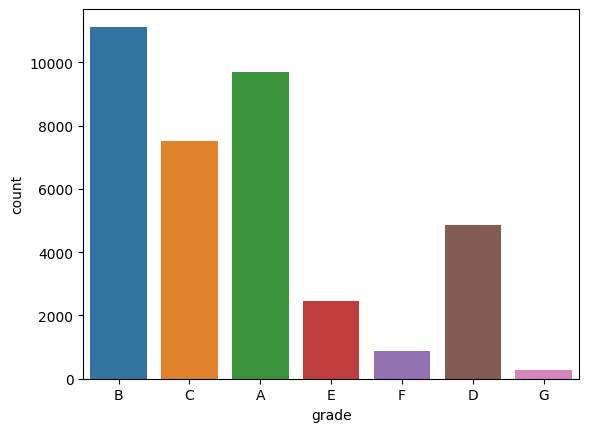

In [76]:
seaborn.countplot(data=loan_df_filtered,x='grade')

**Loans are mostly given in Grade B.These grades are given by the LC officer at the time of granting loans**

We will now see loan distribution over pub_rec and pub_rec_bankruptcies

Text(0.5, 1.0, 'Public Derogratory Records')

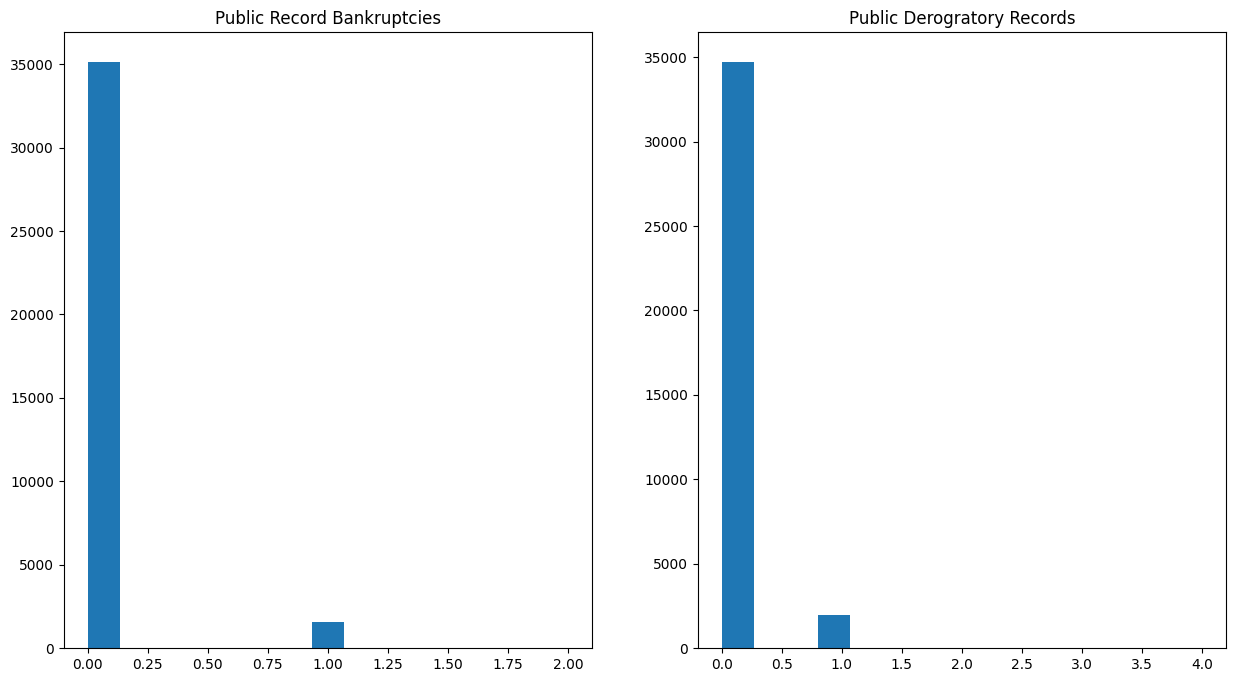

In [85]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(data=loan_df_filtered,x='pub_rec_bankruptcies',bins=15)
plt.title("Public Record Bankruptcies")
plt.subplot(1,2,2)
plt.hist(data=loan_df_filtered,x='pub_rec',bins=15)
plt.title("Public Derogratory Records")





We will biw check the purpose for which loans were taken

<Axes: xlabel='count', ylabel='purpose'>

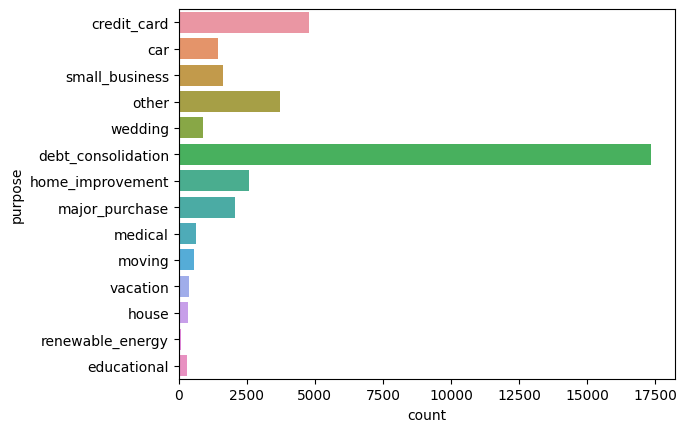

In [86]:
seaborn.countplot(data=loan_df_filtered,y='purpose')

**Debt Consolidation is the main reason for the loan**

We will now see distribution of dti in loans

<Axes: ylabel='dti'>

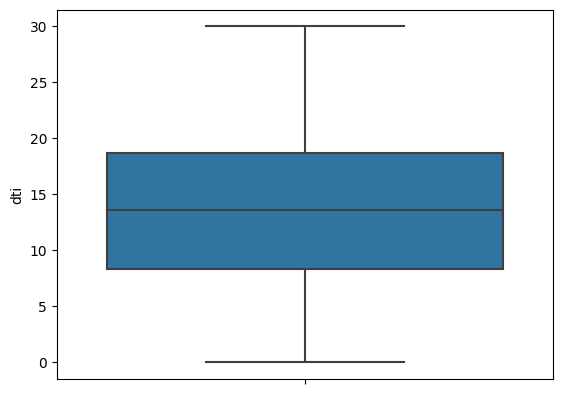

In [90]:
seaborn.boxplot(y=loan_df_filtered['dti'])

#Bivariate Analysis

<Axes: xlabel='home_ownership', ylabel='Charged Off Rate'>

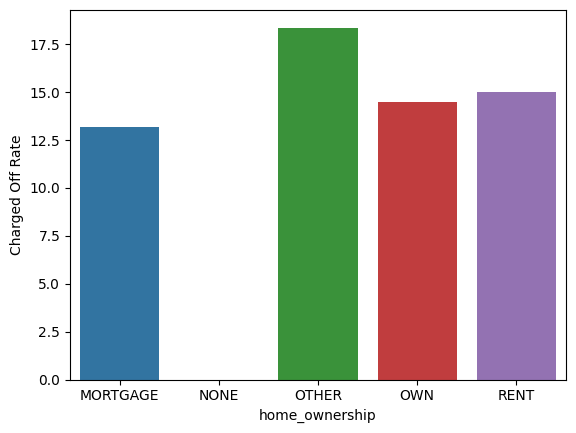

In [107]:
chargeoff_rate_homeownership = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
chargeoff_rate_homeownership['Charged Off Rate'] = 100*(round((chargeoff_rate_homeownership['Charged Off']/chargeoff_rate_homeownership['Total']), 6))
seaborn.barplot(x=chargeoff_rate_homeownership.iloc[0:-1].index,y=chargeoff_rate_homeownership.iloc[0:-1]['Charged Off Rate'])

From the above graph it can be seen that Other as the status has higher charge off rate

In [115]:
chargeoff_rate_purpose = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
chargeoff_rate_purpose['Charged Off Rate'] = 100*(round((chargeoff_rate_purpose['Charged Off']/chargeoff_rate_purpose['Total']), 6))
chargeoff_rate_purpose


loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
purpose,,,,,
car,160,50,1339,1549,10.3292
credit_card,542,103,4485,5130,10.5653
debt_consolidation,2767,586,15288,18641,14.8436
educational,56,0,269,325,17.2308
home_improvement,347,101,2528,2976,11.6599
house,59,14,308,381,15.4856
major_purchase,222,37,1928,2187,10.1509
medical,106,12,575,693,15.2958
moving,92,7,484,583,15.7804


<Axes: xlabel='purpose', ylabel='Charged Off Rate'>

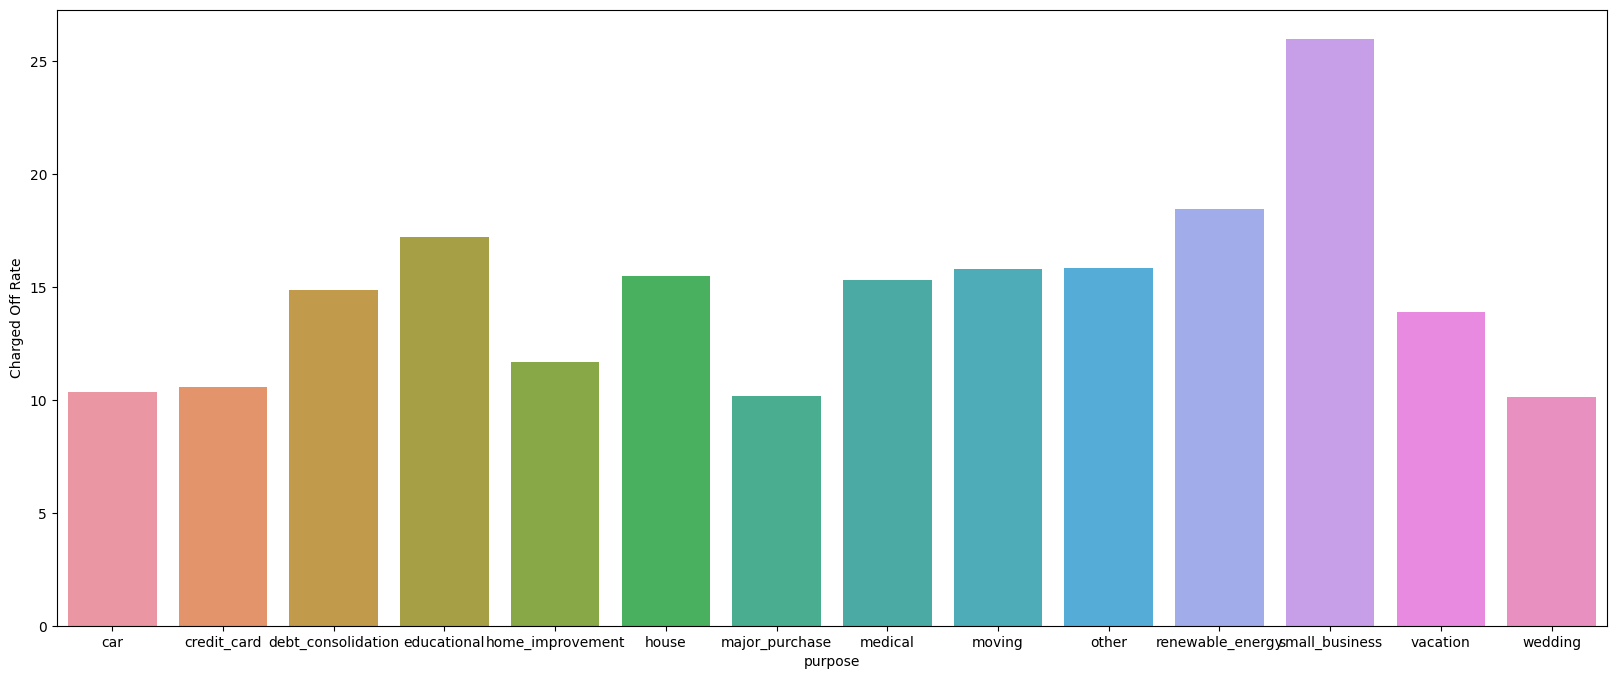

In [114]:
plt.figure(figsize=(20,8))
seaborn.barplot(x=chargeoff_rate_purpose.iloc[0:-1].index,y=chargeoff_rate_purpose.iloc[0:-1]['Charged Off Rate'])

In [116]:
charge_rate_state = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
charge_rate_state['Charged Off Rate'] = 100*(round((charge_rate_state['Charged Off']/charge_rate_state['Total']), 6))
charge_rate_state

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
addr_state,,,,,
AK,15,2,63,80,18.7500
AL,54,17,381,452,11.9469
AR,27,10,208,245,11.0204
AZ,123,30,726,879,13.9932
CA,1125,150,5824,7099,15.8473
CO,98,26,668,792,12.3737
CT,94,25,632,751,12.5166
DC,15,3,196,214,7.0093
DE,12,1,101,114,10.5263


<Axes: xlabel='addr_state', ylabel='Charged Off Rate'>

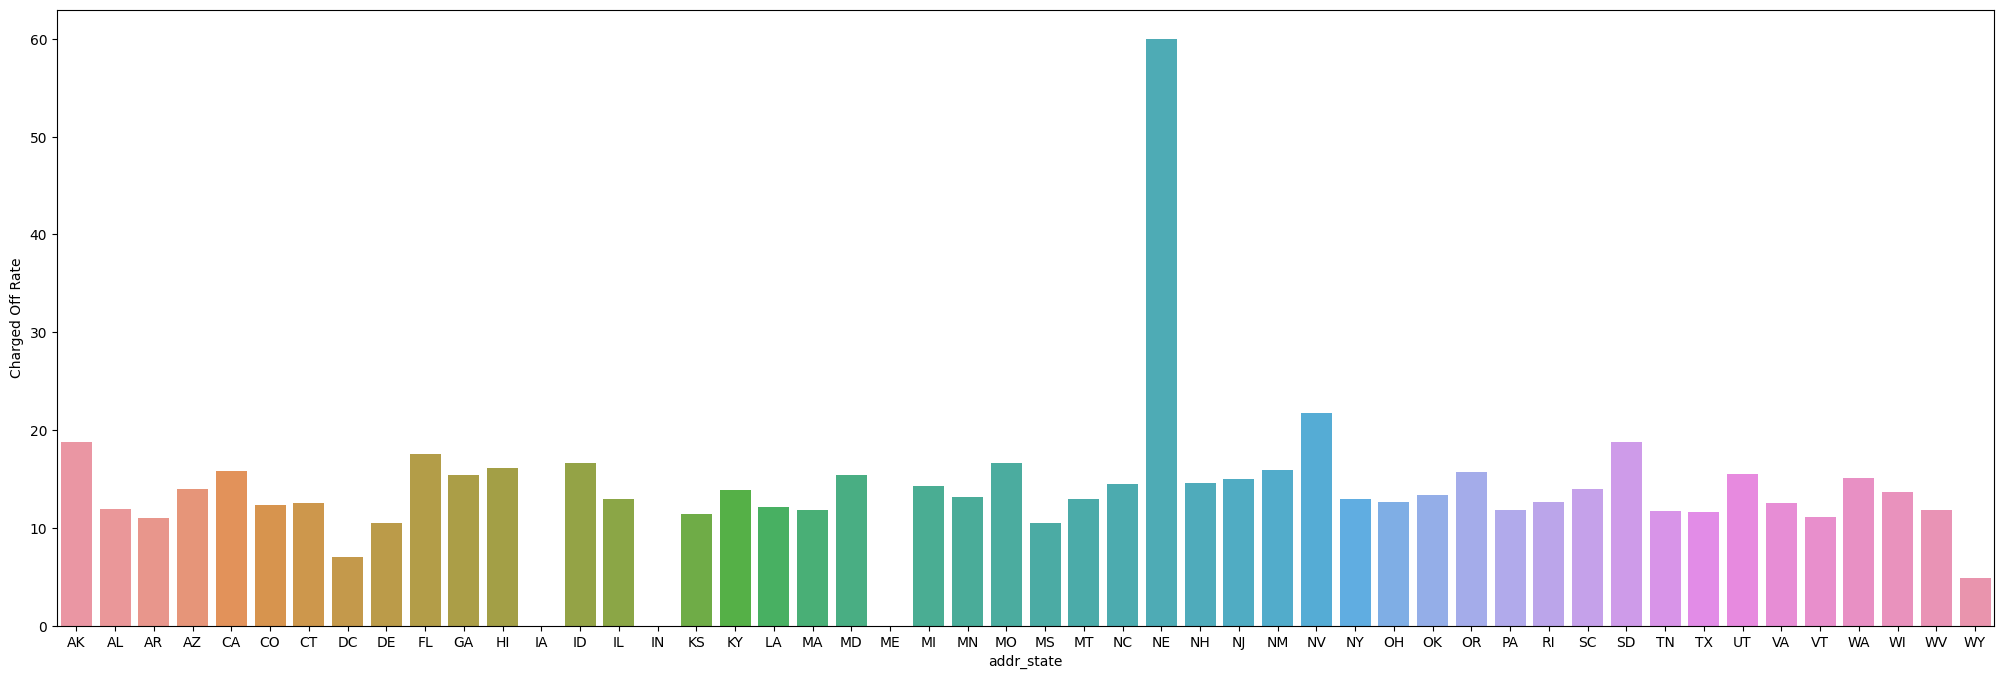

In [176]:
plt.figure(figsize=(25,8))
seaborn.barplot(x=charge_rate_state.iloc[0:-1].index,y=charge_rate_state.iloc[0:-1]['Charged Off Rate'])

<Axes: xlabel='term', ylabel='Charged Off Rate'>

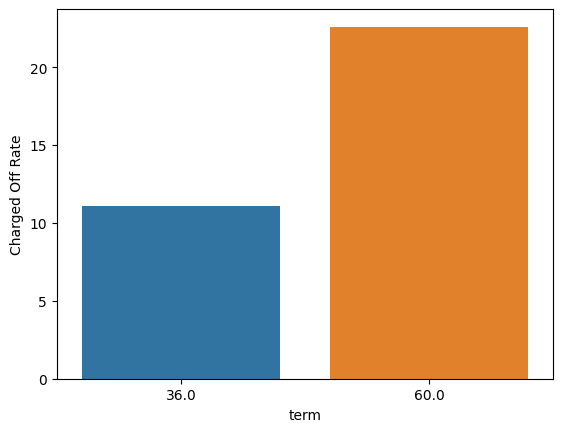

In [120]:
chargeoff_rate_term = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
chargeoff_rate_term['Charged Off Rate'] = 100*(round((chargeoff_rate_term['Charged Off']/chargeoff_rate_term['Total']), 6))
chargeoff_rate_term

<Axes: xlabel='term', ylabel='Charged Off Rate'>

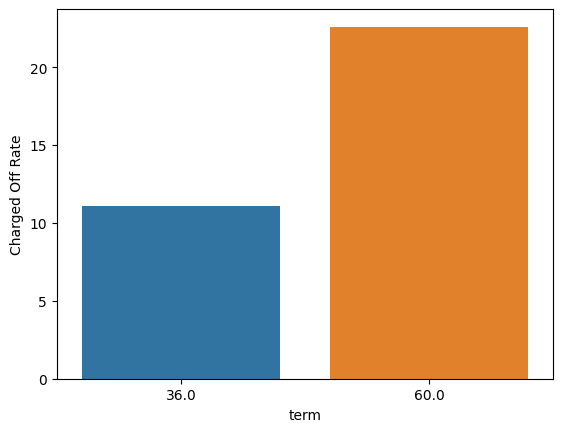

In [121]:
seaborn.barplot(x=chargeoff_rate_term.iloc[0:-1].index,y=chargeoff_rate_term.iloc[0:-1]['Charged Off Rate'])

In [122]:
chargeoff_rate_grade= loan_df.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
chargeoff_rate_grade['Charged Off Rate'] = 100*(round((chargeoff_rate_grade['Charged Off']/chargeoff_rate_grade['Total']), 6))
chargeoff_rate_grade

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
grade,,,,,
A,602,40,9443,10085,5.9693
B,1425,345,10250,12020,11.8552
C,1347,264,6487,8098,16.6337
D,1118,222,3967,5307,21.0665
E,715,179,1948,2842,25.1583
F,319,73,657,1049,30.4099
G,101,17,198,316,31.9620
Total,5627,1140,32950,39717,14.1677


<Axes: xlabel='grade', ylabel='Charged Off Rate'>

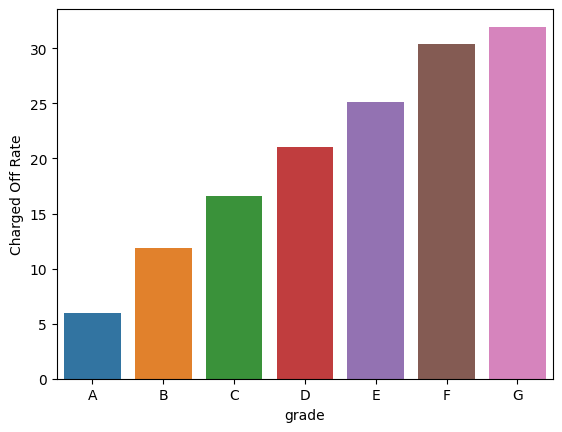

In [123]:
seaborn.barplot(x=chargeoff_rate_grade.iloc[0:].index,y=chargeoff_rate_grade.iloc[0:]['Charged Off Rate'])

In [150]:
charge_off_rate_emp_length = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

charge_off_rate_emp_length['Charged Off Rate'] = 100*(round((charge_off_rate_emp_length['Charged Off']/charge_off_rate_emp_length['Total']), 6))
charge_off_rate_emp_length

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
emp_length,,,,,
0,639,75,3869,4583,13.9428
10,1559,433,7962,9954,15.6620
1,456,71,2713,3240,14.0741
2,567,97,3724,4388,12.9216
3,555,83,3457,4095,13.5531
4,462,94,2880,3436,13.4459
5,458,88,2736,3282,13.9549
6,307,61,1861,2229,13.7730
7,263,62,1448,1773,14.8336


<Axes: xlabel='emp_length', ylabel='Charged Off Rate'>

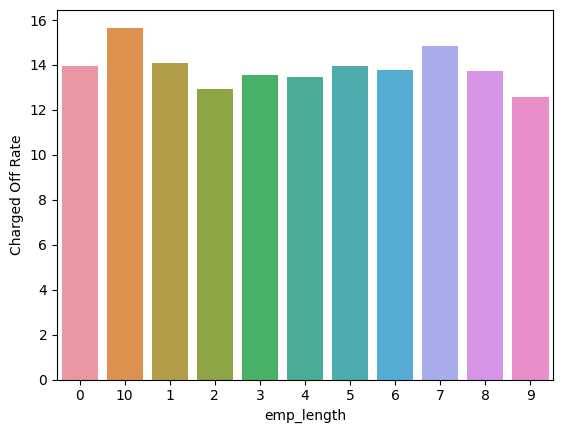

In [151]:
seaborn.barplot(x=charge_off_rate_emp_length.iloc[0:].index,y=charge_off_rate_emp_length.iloc[0:]['Charged Off Rate'])

In [153]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]

rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']

loan_df['annual_inc_rng'] = pandas.cut(loan_df.annual_inc, bins, labels = rng)

charge_off_rate_annual_income = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'annual_inc_rng',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0)

charge_off_rate_annual_income['Total'] = charge_off_rate_annual_income['Charged Off'] + charge_off_rate_annual_income['Current'] + charge_off_rate_annual_income['Fully Paid']

charge_off_rate_annual_income['Charged Off Rate'] = 100*(round((charge_off_rate_annual_income['Charged Off']/charge_off_rate_annual_income['Total']), 6))
charge_off_rate_annual_income


loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
annual_inc_rng,,,,,
0-20000,237,9,943,1189,19.9327
20000-40000,1514,170,7004,8688,17.4263
40000-60000,1729,345,9534,11608,14.8949
60000-80000,1024,240,6597,7861,13.0263
80000-100000,531,170,3983,4684,11.3365
100000-120000,244,81,2084,2409,10.1287
120000-140000,137,39,1081,1257,10.8990
140000-160000,84,37,626,747,11.2450
160000-180000,36,23,348,407,8.8452


<Axes: xlabel='annual_inc_rng', ylabel='Charged Off Rate'>

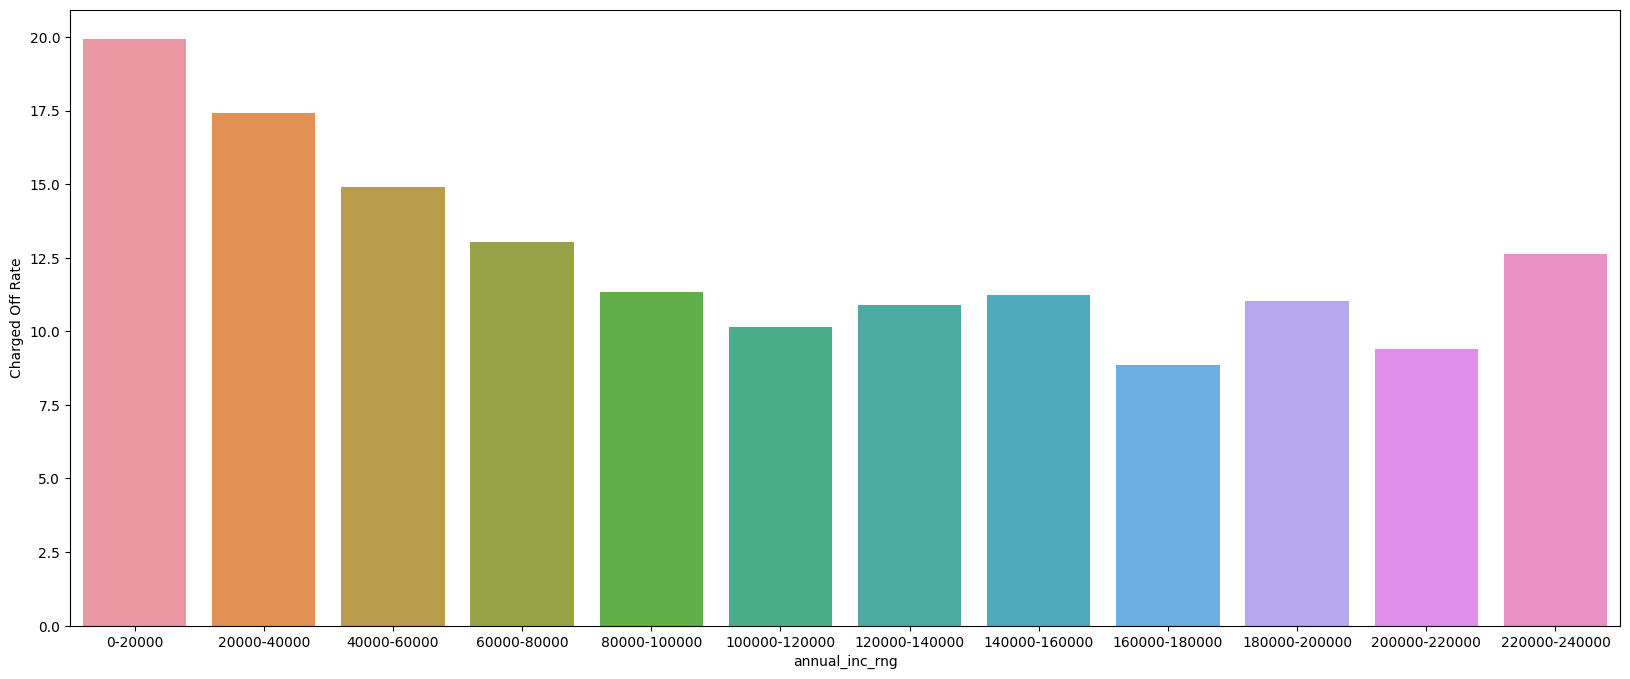

In [175]:
plt.figure(figsize=(20,8))

seaborn.barplot(x=charge_off_rate_annual_income.iloc[0:].index,y=charge_off_rate_annual_income.iloc[0:]['Charged Off Rate'])

In [160]:
charge_off_rate_delinq = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'delinq_2yrs',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0)

charge_off_rate_delinq['Total'] = charge_off_rate_delinq['Charged Off'] + charge_off_rate_delinq['Current'] + charge_off_rate_delinq['Fully Paid']

charge_off_rate_delinq['Charged Off Rate'] = 100*(round((charge_off_rate_delinq['Charged Off']/charge_off_rate_delinq['Total']), 6))
charge_off_rate_delinq

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
delinq_2yrs,,,,,
0,4936,1019,29450,35405,13.9415
1,507,96,2700,3303,15.3497
2,130,14,543,687,18.9229
3,35,8,177,220,15.9091
4,13,2,47,62,20.9677
5,3,1,18,22,13.6364
6,1,0,9,10,10.0000
7,1,0,3,4,25.0000
8,1,0,1,2,50.0000


<Axes: xlabel='delinq_2yrs', ylabel='Charged Off Rate'>

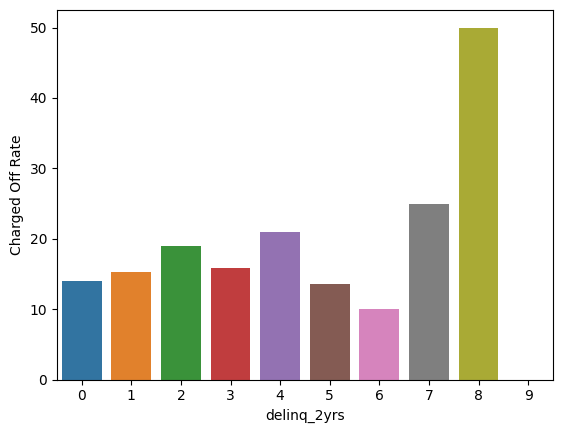

In [161]:
seaborn.barplot(x=charge_off_rate_delinq.iloc[0:].index,y=charge_off_rate_delinq.iloc[0:]['Charged Off Rate'])

In [164]:
charge_off_inquiry = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'inq_last_6mths',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0)

charge_off_inquiry['Total'] = charge_off_inquiry['Charged Off'] + charge_off_inquiry['Current'] + charge_off_inquiry['Fully Paid']

charge_off_inquiry['Charged Off Rate'] = 100*(round((charge_off_inquiry['Charged Off']/charge_off_inquiry['Total']), 6))
charge_off_inquiry

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
inq_last_6mths,,,,,
0,2280,591,16429,19300,11.8135
1,1677,311,8983,10971,15.2858
2,943,158,4711,5812,16.2251
3,619,65,2364,3048,20.3084
4,51,10,265,326,15.6442
5,28,2,116,146,19.1781
6,16,1,47,64,25.0000
7,10,1,24,35,28.5714
8,3,1,11,15,20.0000


<Axes: xlabel='inq_last_6mths', ylabel='Charged Off Rate'>

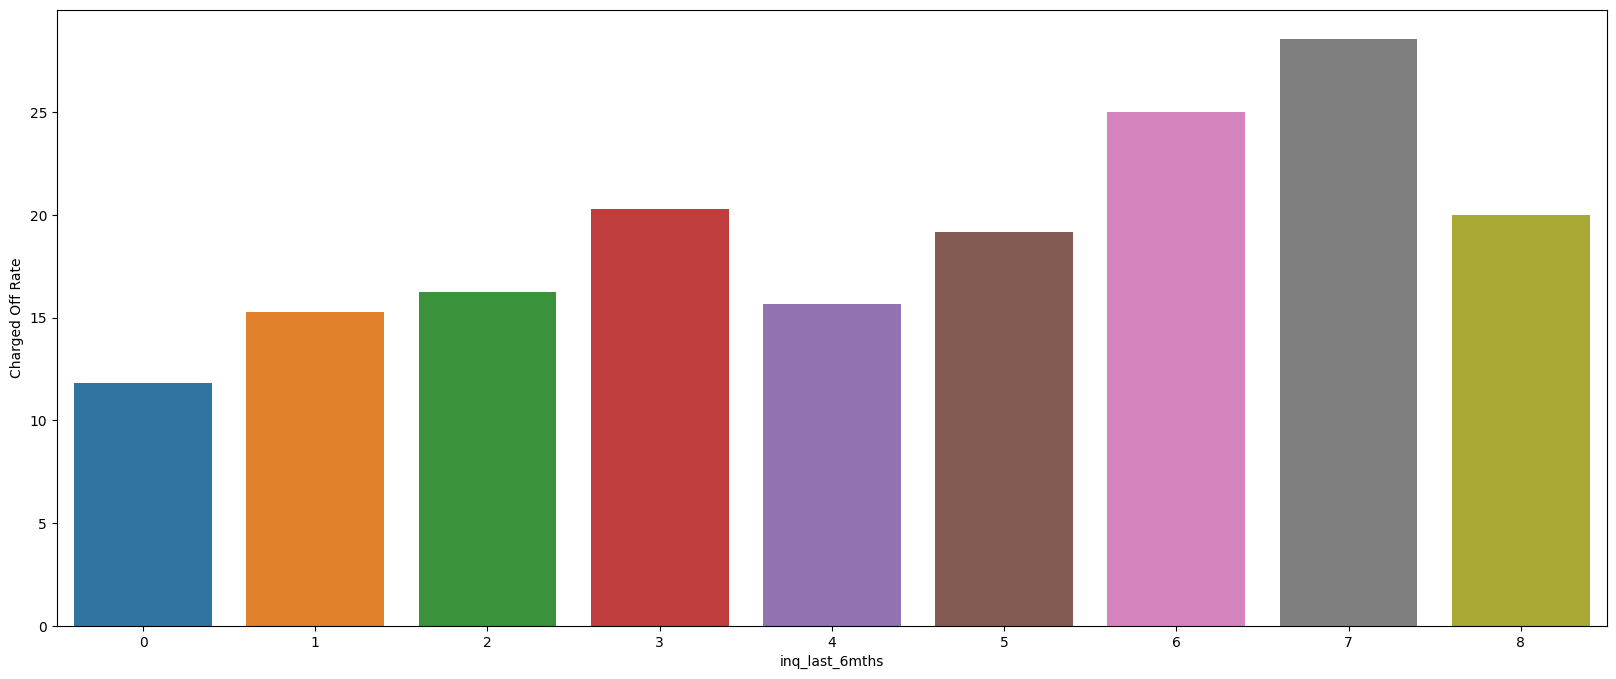

In [173]:
plt.figure(figsize=(20,8))

seaborn.barplot(x=charge_off_inquiry.iloc[0:].index,y=charge_off_inquiry.iloc[0:]['Charged Off Rate'])

In [177]:
charge_off_pub_rec = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'pub_rec',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0)

charge_off_pub_rec['Total'] = charge_off_pub_rec['Charged Off'] + charge_off_pub_rec['Current'] + charge_off_pub_rec['Fully Paid']

charge_off_pub_rec['Charged Off Rate'] = 100*(round((charge_off_pub_rec['Charged Off']/charge_off_pub_rec['Total']), 6))
charge_off_pub_rec

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
pub_rec,,,,,
0,5160,1094,31347,37601,13.7230
1,457,43,1556,2056,22.2276
2,10,3,38,51,19.6078
3,0,0,7,7,0.0000
4,0,0,2,2,0.0000


<Axes: xlabel='pub_rec', ylabel='Charged Off Rate'>

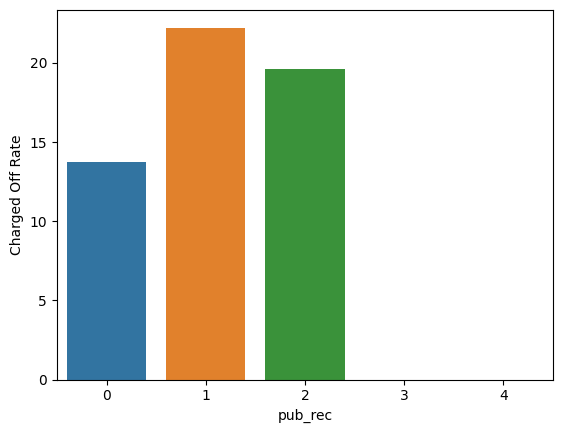

In [178]:
seaborn.barplot(x=charge_off_pub_rec.iloc[0:].index,y=charge_off_pub_rec.iloc[0:]['Charged Off Rate'])

In [180]:
charge_off_pub_rec_bkruptcies = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'pub_rec_bankruptcies',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0)

charge_off_pub_rec_bkruptcies['Total'] = charge_off_pub_rec_bkruptcies['Charged Off'] + charge_off_pub_rec_bkruptcies['Current'] + charge_off_pub_rec_bkruptcies['Fully Paid']

charge_off_pub_rec_bkruptcies['Charged Off Rate'] = 100*(round((charge_off_pub_rec_bkruptcies['Charged Off']/charge_off_pub_rec_bkruptcies['Total']), 6))
charge_off_pub_rec_bkruptcies

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
pub_rec_bankruptcies,,,,,
0.0,5259,1101,31676,38036,13.8264
1.0,366,37,1271,1674,21.8638
2.0,2,2,3,7,28.5714


<Axes: xlabel='pub_rec_bankruptcies', ylabel='Charged Off Rate'>

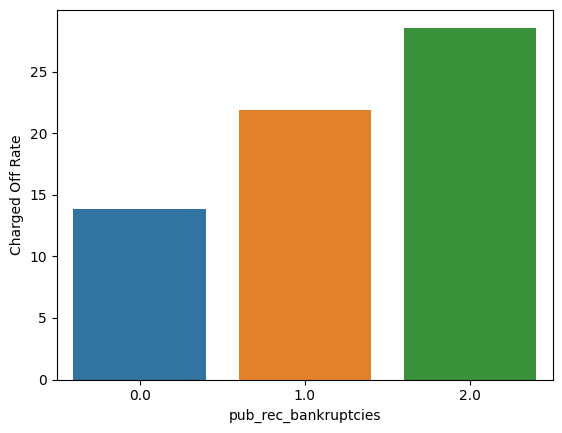

In [181]:
seaborn.barplot(x=charge_off_pub_rec_bkruptcies.iloc[0:].index,y=charge_off_pub_rec_bkruptcies.iloc[0:]['Charged Off Rate'])

In [182]:
charge_off_verification_status = loan_df.pivot_table(values = 'funded_amnt',
                      index = 'verification_status',
                      columns = 'loan_status',
                      aggfunc = numpy.count_nonzero,
                      fill_value = 0)

charge_off_verification_status['Total'] = charge_off_verification_status['Charged Off'] + charge_off_verification_status['Current'] + charge_off_verification_status['Fully Paid']

charge_off_verification_status['Charged Off Rate'] = 100*(round((charge_off_verification_status['Charged Off']/charge_off_verification_status['Total']), 6))
charge_off_verification_status

loan_status,Charged Off,Current,Fully Paid,Total,Charged Off Rate
verification_status,,,,,
Not Verified,2142,227,14552,16921,12.6588
Source Verified,1434,310,8243,9987,14.3587
Verified,2051,603,10155,12809,16.0122


<Axes: xlabel='verification_status', ylabel='Charged Off Rate'>

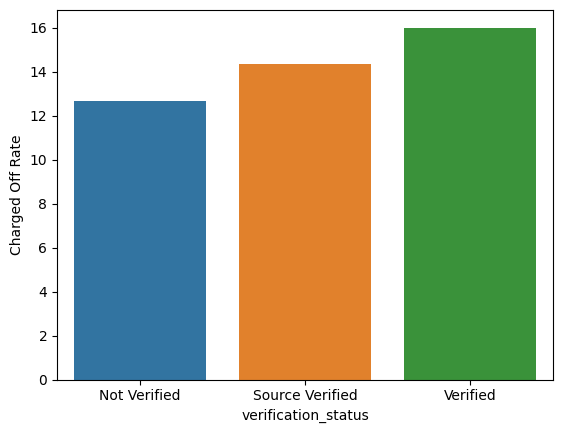

In [183]:
seaborn.barplot(x=charge_off_verification_status.iloc[0:].index,y=charge_off_verification_status.iloc[0:]['Charged Off Rate'])

# Segmented Univariate Analysis

Getting the number of Charged Off Loan and Loans Paid in Complete

In [ ]:
ax =seaborn.countplot(x=loan_df_filtered['loan_status'],data=loan_df_filtered)
ax.bar_label(ax.containers[0])

It can be seen from the above plot that we have 5627 as Charged Off Loan and Fully Paid loan are 32950

Now we will gather the categorical variables from the dataset and see the relation of Loan Default with them

#### Categorical Univariate Analysis





Checking the Grade of the Loans which are charged off

In [ ]:
loan_charged_off=loan_df_filtered[(loan_df_filtered['loan_status']=='Charged Off')]

In [ ]:
loan_charged_off['grade'].count()

In [ ]:
seaborn.countplot(x=loan_charged_off['grade'],data=loan_charged_off)

**It can be seen from the above graphical representation that Loans of Grade B are mostly defaulted**

Checking the employment tenure of the people who have defaulted on loans

In [ ]:
seaborn.countplot(x=loan_charged_off['emp_length'],data=loan_charged_off)

**It can be seen from the above graph employees which 10 or more years of experience have tendency to default on Loan**

Checking what is the status of home ownership of defaulted people

In [ ]:
seaborn.countplot(x=loan_charged_off['home_ownership'],data=loan_charged_off)

**Maximum number of people who have defaulted have rented accomadation**

Now we will check from what state most of the defaulted people were

In [ ]:
plt.figure(figsize=(15,8))
fig=seaborn.countplot(x=loan_charged_off['addr_state'],data=loan_charged_off)

**Majority of the defaults are happening from the state of California**

Now we will validate if the income of the applicants for defaulted loan was verified or not

In [ ]:
fig=seaborn.countplot(x=loan_charged_off['verification_status'],data=loan_charged_off)

**It is evident from the above graph that source of income of the defaulers was not verified**

Now we will check if any particular purpose of a loan plays an important part in defaulting on loan payment

In [ ]:
plt.figure(figsize=(25,8))
fig=seaborn.countplot(x=loan_charged_off['purpose'],data=loan_charged_off)

**From the above graph it could be seen that debt consolidation is the main purpose for which loan is taken and defaulted.This means that people already have certain debt on them**

Now we will see the month in which loans issued are defaulted

In [ ]:
loan_charged_off['issue_d']=loan_charged_off.issue_d.apply(lambda d: datetime.strptime(d, '%b-%y'))

In [ ]:
loan_charged_off['issue_month']=loan_charged_off['issue_d'].dt.month
loan_charged_off['issue_year']=loan_charged_off['issue_d'].dt.year


In [ ]:
fig=seaborn.countplot(x=loan_charged_off['issue_month'],data=loan_charged_off)

**Most of the loans are issued in the month of December.This seems fair as it is Holiday season and people apply for loans**

In [ ]:
fig=seaborn.countplot(x=loan_charged_off['issue_year'],data=loan_charged_off)

**The number of loans issued have increased consistently and os has the default rate**

#### Univariate Loan Default Analysis with Continuous Variables

# *Multivariate* Analysis

In [ ]:
seaborn.heatmap(loan_df_filtered.corr())

As it can be seen from the above heat map.

1.   There is very high correlation between loan_amnt,funded_amnt,funded_amnt_inv.

2.   There is high correlation between pub_rec_bankruptcies and pub_rec

3.   There is medium correlation between open_acc and total_acc

4.   There is relatively medium correlation between term and int_rate





#Conclusion